In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re

In C:\Users\PKN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\PKN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\PKN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\PKN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\PKN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
Th

In [2]:
stop_list = nltk.corpus.stopwords.words('english')

In [3]:
review = pd.read_csv('F:/Applied Machine Learning/Project/data/reviews.csv/reviews.csv')

In [4]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [6]:
review['date'].min()

'2009-12-21'

In [5]:
review = review.drop(['listing_id','id','date','reviewer_id','reviewer_name'],axis = 1)
review.head()

,comments
0,My girlfriend and I hadn't known Alina before ...
1,Alina was a really good host. The flat is clea...
2,Alina is an amazing host. She made me feel rig...
3,"Alina's place is so nice, the room is big and ..."
4,"Nice location in Islington area, good for shor..."


In [6]:
corpus = review['comments']

In [7]:
corpus

0          My girlfriend and I hadn't known Alina before ...
1          Alina was a really good host. The flat is clea...
2          Alina is an amazing host. She made me feel rig...
3          Alina's place is so nice, the room is big and ...
4          Nice location in Islington area, good for shor...
                                 ...                        
1472728    Well present flat! The host is very kind and c...
1472729    Good condition, clean, fairly spacious. Everyt...
1472730    体验真的很棒,超值的! 房子很新,而且装潢很精致,位置也很方便,在入住前房东肖先生就跟我耐心...
1472731            You will not be disappointed. Great flat.
1472732    Do not expect much it’s very dirty there is no...
Name: comments, Length: 1472733, dtype: object

In [8]:
corpus.index.values

array([      0,       1,       2, ..., 1472730, 1472731, 1472732],
      dtype=int64)

In [1]:
from langdetect import detect

In [8]:
detect("体验真的很棒,超值的! 房子很新,而且装潢很精致,位置也很方便,在入住前房东肖先生就跟我耐")

'zh-cn'

In [18]:
index_values = corpus.index.values

In [21]:
docs1 = []
for i in index_values:
    doc_raw = corpus[i]
    doc = nltk.word_tokenize(str(doc_raw))
    docs1.append(doc)

In [22]:
docs2 = [[w.lower() for w in doc] for doc in docs1]
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]

In [23]:
docs4

[['girlfriend',
  'known',
  'alina',
  'took',
  'leap',
  'faith',
  'rent',
  'flat',
  'alina',
  'could',
  'nicer',
  'flat',
  'comfortable',
  'homey',
  'sunny',
  'quiet',
  'night',
  'diverse',
  'neighborhood',
  'rocks',
  'full',
  'excellent',
  'eateries',
  'varying',
  'ethnicities',
  'good',
  'supermarkets',
  'etc',
  'place',
  'walk',
  'finsbury',
  'park',
  'tube',
  'stop',
  'also',
  'several',
  'buses',
  'ply',
  'stroud',
  'green',
  'road',
  'piccadilly',
  'victoria',
  'tube',
  'lines',
  'serve',
  'finsbury',
  'park',
  'dependable',
  'come',
  'frequently',
  'caveat',
  'unwilling',
  'take',
  'commutes',
  'downtown',
  'london',
  'attractions',
  'money',
  'object',
  'prefer',
  'stay',
  'downtown',
  'anyone',
  'else',
  'love',
  'experience',
  'living',
  'real',
  'untouristy',
  'neighborhood',
  'dealing',
  'generous',
  'woman',
  'happy',
  'call',
  'new',
  'friend'],
 ['alina',
  'really',
  'good',
  'host',
  'flat',

In [24]:
docs_joined = [" ".join(x) for x in docs4]

In [26]:
docs_joined[0]

'girlfriend known alina took leap faith rent flat alina could nicer flat comfortable homey sunny quiet night diverse neighborhood rocks full excellent eateries varying ethnicities good supermarkets etc place walk finsbury park tube stop also several buses ply stroud green road piccadilly victoria tube lines serve finsbury park dependable come frequently caveat unwilling take commutes downtown london attractions money object prefer stay downtown anyone else love experience living real untouristy neighborhood dealing generous woman happy call new friend'

In [38]:
from langdetect.lang_detect_exception import LangDetectException

In [39]:
## Filtering out all language reviews other than english
new_docs = []
for i in range(len(docs_joined)):
    try:
        if detect(docs_joined[i])=='en':
            new_docs.append(docs_joined[i])
    except LangDetectException:
        pass    

In [43]:
len(docs_joined)

1472733

In [16]:
len(new_docs)

1230643

In [9]:
## Preparing stop list of host names
listing = pd.read_csv('F:/Applied Machine Learning/Project/data/listings.csv/listings.csv')

C:\Users\PKN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [11]:
listing['host_name'].head()

0        Alina
1     Philippa
2          Liz
3    Charlotte
4       Amanda
Name: host_name, dtype: object

In [22]:
host_names = list(listing['host_name'].unique())

In [33]:
hosts = []
for i in range(0,len(host_names)):
    host_name_lower = str(host_names[i]).lower()
    hosts.append(host_name_lower)

In [34]:
hosts

['alina',
 'philippa',
 'liz',
 'charlotte',
 'amanda',
 'grace',
 'chi-chi',
 'geert',
 'agri & roger',
 'michael',
 'lisa',
 'john',
 'elisa & dom',
 'paul',
 'cesar',
 'alec',
 'sean',
 'peter',
 'nina',
 'bimpe',
 'maria',
 'shelley',
 'sylvan',
 'calypso',
 'sally',
 's',
 'deb',
 'lina',
 'domenico',
 "let's dance, put on your red shoes",
 'keti',
 'boris',
 'sarah',
 'louise',
 'beth',
 'trudi',
 'fay',
 'ester',
 'jacinta',
 'khalid',
 'prateek',
 'julie',
 'mike',
 'kate',
 'simon',
 'laura d',
 'alda',
 'matthew',
 'emi',
 'nicola',
 'julia',
 'danielle',
 'thesla',
 'christopher',
 'nicholas',
 'melanie',
 'esther',
 'aslak',
 'lucy',
 'fernando',
 'kris',
 'william & emilia',
 'petra',
 'carol',
 'richard',
 'bradley',
 'antonia clare',
 'murielle',
 'isabelle',
 'elisabetta',
 'cass',
 'aliye',
 'amy  gabriella',
 'andrea',
 'paullus',
 'angela',
 'pearline',
 'dominic',
 'melinda and tony',
 'daniel',
 'gillian',
 'chil',
 'deirdre',
 'william',
 'gabriele',
 'carl and ch

In [17]:
docs5 = []
for i in range(len(new_docs)):
    doc_new = new_docs[i]
    doc_removehost = nltk.word_tokenize(doc_new)
    docs5.append(doc_removehost)

In [37]:
docs6 = [[w for w in doc if w not in hosts] for doc in docs5]

In [38]:
docs6

[['girlfriend',
  'known',
  'took',
  'leap',
  'flat',
  'could',
  'nicer',
  'flat',
  'comfortable',
  'homey',
  'quiet',
  'night',
  'diverse',
  'neighborhood',
  'rocks',
  'full',
  'excellent',
  'eateries',
  'varying',
  'ethnicities',
  'supermarkets',
  'etc',
  'place',
  'walk',
  'finsbury',
  'park',
  'tube',
  'stop',
  'also',
  'several',
  'buses',
  'ply',
  'stroud',
  'green',
  'road',
  'piccadilly',
  'tube',
  'lines',
  'serve',
  'finsbury',
  'park',
  'dependable',
  'come',
  'frequently',
  'caveat',
  'unwilling',
  'take',
  'commutes',
  'downtown',
  'attractions',
  'money',
  'object',
  'prefer',
  'downtown',
  'anyone',
  'else',
  'love',
  'experience',
  'living',
  'real',
  'untouristy',
  'neighborhood',
  'dealing',
  'generous',
  'woman',
  'call',
  'new',
  'friend'],
 ['really',
  'flat',
  'clean',
  'tidy',
  'really',
  'close',
  'finsbury',
  'park',
  'station',
  'quite',
  'close',
  'recommend',
  'everyone'],
 ['amazi

In [39]:
final_docs = [" ".join(x) for x in docs6]

In [45]:
final_docs

['girlfriend known took leap flat could nicer flat comfortable homey quiet night diverse neighborhood rocks full excellent eateries varying ethnicities supermarkets etc place walk finsbury park tube stop also several buses ply stroud green road piccadilly tube lines serve finsbury park dependable come frequently caveat unwilling take commutes downtown attractions money object prefer downtown anyone else love experience living real untouristy neighborhood dealing generous woman call new friend',
 'really flat clean tidy really close finsbury park station quite close recommend everyone',
 'amazing made feel right home like hanging friend complete stranger sweet makes mean espresso tons places right around flat eat market close case want cook would definitely thanks awesome',
 'place big clean bed huge great made sure everything needed instance put clean towels bed felt home place aside really helped lot things even helped find permanent place live overall great place great girl',
 'locat

In [3]:
import pickle

In [43]:
## Save list to pickle file
with open('F:/Applied Machine Learning/Project/final_review_list','wb') as f:
    pickle.dump(final_docs,f)

In [4]:
## Read list from pickle file
with open('F:/Applied Machine Learning/Project/final_review_list','rb') as f:
    final_docs = pickle.load(f)

In [5]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer(min_df = 1000, max_df = 0.5)
vecs = vectorizer.fit_transform(final_docs)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [6]:
vecs

<1230642x1946 sparse matrix of type '<class 'numpy.int64'>'
	with 21806861 stored elements in Compressed Sparse Row format>

### Alpha = 50/Num_topics and Beta = 0.1

In [13]:
# Can take a long time to run. In this case we are going to k_max=20.
import datetime
print(datetime.datetime.now())

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 25, 2):
    lda = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 50/num_topics, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
    lda.fit_transform(vecs)
    model_topics.append(num_topics)
    model_list.append(lda)
    perplexity_values.append(lda.perplexity(vecs))
    print("#Topics: " + str(num_topics) + ", Score: " + str(lda.perplexity(vecs)))

print(datetime.datetime.now())

2020-07-18 05:14:46.804359
#Topics: 2, Score: 582.9451060515983
#Topics: 4, Score: 575.3162358614445
#Topics: 6, Score: 567.9983605417095
#Topics: 8, Score: 566.1511733934497
#Topics: 10, Score: 564.6769974222387
#Topics: 12, Score: 564.6337109908072
#Topics: 14, Score: 564.6129826384375
#Topics: 16, Score: 565.2294928483967
#Topics: 18, Score: 564.0507540499297
#Topics: 20, Score: 563.5501932210324
#Topics: 22, Score: 562.8833921098301
#Topics: 24, Score: 562.3607731749789
2020-07-18 13:43:25.720332


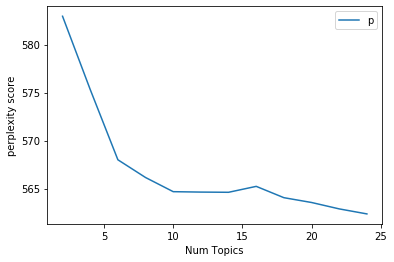

In [15]:
# Show graph

import matplotlib.pyplot as plt

limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [16]:
#LDA
n, m = vecs.shape
k = 14
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

In [17]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
small one bit shower bedroom bathroom quite overall door floor water however building noise rooms
Topic 1:
clean easy quiet super thanks located welcoming comfortable highly access transport cosy public safe place
Topic 2:
place would recommend really definitely staying enjoyed cozy anyone others brixton confortable understanding consider wants
Topic 3:
well comfortable area kitchen spacious bathroom amenities modern equipped plenty large beds private pleasant decorated
Topic 4:
clean helpful friendly amazing beautiful hosts kind always warm stylish absolutely tidy garden hospitality book
Topic 5:
also get back around best come go place lot want places food person see take
Topic 6:
close station tube walk restaurants convenient near quick shops lots right train minute local short
Topic 7:
minutes bus away street walking underground walk many distance neighborhood nearby park two within road
Topic 8:
great location flat days arrival reservation canceled automated posting flexib

In [18]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6129826384375


In [19]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6129826384375


In [20]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6129826384375


In [21]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6129826384375


In [22]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6129826384375


In [23]:
#LDA
n, m = vecs.shape
k = 12
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

In [24]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
one night small bit people shower bathroom quite bedroom overall door floor water sleep however
Topic 1:
clean easy helpful highly quiet friendly thanks super welcoming recommended access transport public cosy kind
Topic 2:
place would really recommend definitely staying time enjoyed perfect cozy anyone cool others liked brixton
Topic 3:
comfortable well area space bed kitchen spacious bathroom big modern equipped plenty large amenities pleasant
Topic 4:
home amazing beautiful hosts thank feel warm always felt welcome absolutely loved garden like hospitality
Topic 5:
also back get like time come best go lot make breakfast experience want enough better
Topic 6:
close station tube walk restaurants around convenient quick near shops right train minute lots local
Topic 7:
minutes bus away walk street walking underground many short neighborhood distance nearby park within two
Topic 8:
great location flat days value arrival money reservation canceled automated posting ideal perfect 

In [25]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6320192704735


In [26]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6320192704735


In [27]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6320192704735


In [28]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6320192704735


In [29]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6320192704735


In [30]:
#LDA
n, m = vecs.shape
k = 10
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

In [31]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
one night bit small shower people bedroom bathroom door floor quite water use work overall
Topic 1:
clean easy helpful highly friendly quiet recommend thanks welcoming recommended located access kind comfortable transport
Topic 2:
place would really recommend perfect definitely time staying enjoyed cozy anyone fantastic accommodating visiting cute
Topic 3:
well comfortable area space kitchen bed spacious excellent bathroom amenities big modern equipped plenty provided
Topic 4:
home like amazing beautiful thank hosts wonderful feel warm family best felt back always loved
Topic 5:
us also even day go lot make first breakfast every way get arrived enough time
Topic 6:
apartment close station tube convenient around quick get near right super train lots exactly quickly
Topic 7:
walk restaurants minutes bus away street walking underground short shops many neighborhood distance minute nearby
Topic 8:
great location flat communication days value arrival responsive money reservation ca

In [32]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6763392433551


In [33]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6763392433551


In [34]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6763392433551


In [35]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6763392433551


In [36]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  564.6763392433551


In [37]:
#LDA
n, m = vecs.shape
k = 6
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

In [38]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
one bed bathroom kitchen night small people bit shower quite two bedroom overall use could
Topic 1:
clean flat easy comfortable quiet highly helpful recommend located super close excellent well days recommended
Topic 2:
great place location would really perfect everything definitely recommend communication enjoyed fantastic value quick need
Topic 3:
station walk tube close well restaurants minutes area away bus street near short walking underground
Topic 4:
home amazing friendly like beautiful thank hosts wonderful made back much staying space family feel
Topic 5:
apartment us also get time around even needed day go right lot could provided make


In [39]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.9971161164539


In [40]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.9971161164539


In [41]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.9971161164539


In [42]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.9971161164539


In [43]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.9971161164539


In [44]:
#LDA
n, m = vecs.shape
k = 8
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

In [45]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
one bathroom night small bit people shower bed bedroom quite kitchen use overall two door
Topic 1:
clean recommend easy helpful highly friendly quiet thanks days place welcoming recommended arrival comfortable access
Topic 2:
great place would really definitely perfect location recommend enjoyed staying time fantastic everything cozy stayed
Topic 3:
well comfortable area apartment space need spacious excellent bed kitchen amenities modern extremely provided equipped
Topic 4:
home amazing like beautiful wonderful thank made much hosts back feel warm experience family best
Topic 5:
us also could get even time day go lot make around breakfast first sure find
Topic 6:
location flat close apartment everything communication super convenient quick near needed little right responsive exactly
Topic 7:
station walk tube restaurants minutes bus away street walking underground shops short many neighborhood distance


In [46]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  566.1500489547193


In [47]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  566.1500489547193


In [48]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  566.1500489547193


In [49]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  566.1500489547193


In [50]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  566.1500489547193


In [7]:
#LDA
n, m = vecs.shape
k = 7
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

In [8]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
one bathroom bed night kitchen small people bit shower quite bedroom overall use two door
Topic 1:
clean easy recommend comfortable helpful highly place quiet super located thanks days communication friendly welcoming
Topic 2:
great location place would really perfect definitely everything recommend enjoyed fantastic value money accommodating communication
Topic 3:
well area apartment space need spacious excellent comfortable walking amenities short distance modern within local
Topic 4:
home amazing like beautiful thank wonderful hosts made much back feel staying friendly family experience
Topic 5:
us apartment also time get even could day around go lot make find breakfast sure
Topic 6:
flat station close walk tube restaurants minutes bus away convenient street near underground shops right


In [9]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.1377112364024


In [10]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.1377112364024


In [57]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.137714326252


In [58]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.137714326252


In [59]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  567.137714326252


In [60]:
#LDA
n, m = vecs.shape
k = 5
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

In [61]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
one kitchen bed bathroom night small people could bit day shower quite two bedroom little
Topic 1:
clean flat comfortable easy well quiet highly helpful close located area friendly recommend super excellent
Topic 2:
great place location would really perfect everything recommend definitely communication time enjoyed fantastic need quick
Topic 3:
apartment station walk tube also close restaurants minutes around bus away get street near short
Topic 4:
us home like back beautiful made thank much wonderful time feel family experience amazing best


In [62]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  569.1761932259072


In [63]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  569.1761932259072


In [64]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  569.1761932259072


In [65]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  569.1761932259072


In [66]:
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  569.1761932259072


In [11]:
#Set up the environment to display the graphical outputs
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

C:\Users\PKN\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [12]:
# Generate the visuals
visual = pyLDAvis.sklearn.prepare(lda, vecs, vectorizer, mds='tsne')## Run the lda for the best k and then use these params

C:\Users\PKN\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\PKN\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [13]:
#Save the output|to the html file
pyLDAvis.save_html(visual, "topic_viz_sklearn.html")

In [15]:
import joblib
#Save a model to disk, or reload a pre-trained model

#sg_lda=model_list[2]
joblib.dump(lda, 'lda.jl')

In [16]:
# # then reload it with
lda_disk = joblib.load('lda.jl')

In [17]:
# Create Document - Topic Matrix
#I choose model_list[2] where the number of topics is 6
lda_output = lda_disk.transform(vecs)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_disk.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(final_docs))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 5), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
num_doc_to_show = 10  # change this to display the number of documents shown below
df_document_topics = df_document_topic.head(num_doc_to_show).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic
Doc0,0.14184,0.08542,0.0947,0.0967,0.14625,0.13668,0.29841,6
Doc1,0.12763,0.15947,0.15108,0.1151,0.12709,0.11458,0.20505,6
Doc2,0.14029,0.1072,0.12542,0.09787,0.19822,0.15564,0.17536,4
Doc3,0.16049,0.12343,0.1892,0.11153,0.13771,0.18939,0.08825,5
Doc4,0.14059,0.15051,0.14013,0.1592,0.13516,0.13421,0.1402,3
Doc5,0.1775,0.09398,0.1371,0.09267,0.15497,0.17612,0.16766,0
Doc6,0.10935,0.11942,0.14637,0.12222,0.22366,0.16773,0.11126,4
Doc7,0.13914,0.16197,0.14156,0.12574,0.1638,0.12535,0.14243,4
Doc8,0.1897,0.11369,0.13161,0.15814,0.15784,0.10769,0.14133,0
Doc9,0.11358,0.17088,0.11366,0.11378,0.18096,0.13174,0.1754,4


In [18]:
#Code to save theta
import pandas as pd

df_document_topic.to_csv("doc_topic.csv")

In [19]:
# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
    
for topic_idx, topic in enumerate(lda.components_):
    topic_word_P = [(topic_idx, feature_names[i], topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    top_words_per_topic.extend(topic_word_P)

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")